# Data Preparation

In [23]:
# Necessary Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Will add more imports here later

In [66]:
# Directory Name
file_path = "../dataset/sale-prediction/"



publicHouseOne = "resale-flat-prices-based-on-approval-date-1990-1999.csv"
publicHouseTwo = "resale-flat-prices-based-on-approval-date-2000-feb-2012.csv"
publicHouseThree = "resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv"
publicHouseFour = "resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv"
publicHouseFive = "resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"

df1 = pd.read_csv(file_path + publicHouseOne)
df2 = pd.read_csv(file_path + publicHouseTwo)
df3 = pd.read_csv(file_path + publicHouseThree)
df4 = pd.read_csv(file_path + publicHouseFour)
df5 = pd.read_csv(file_path + publicHouseFive)
df1.head(5)
#df1.shape
#df2.shape
#df3.shape
#df4.shape
#df5.shape


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [56]:
finaldf = pd.concat([df1,df2, df3,df4,df5],axis=0, join='inner').sort_index()
finaldf.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0


In [57]:
# Checks how many rows/columns are there
finaldf.shape

(843924, 10)

In [58]:
# Check data types of columns
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843924 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                843924 non-null  object 
 1   town                 843924 non-null  object 
 2   flat_type            843924 non-null  object 
 3   block                843924 non-null  object 
 4   street_name          843924 non-null  object 
 5   storey_range         843924 non-null  object 
 6   floor_area_sqm       843924 non-null  float64
 7   flat_model           843924 non-null  object 
 8   lease_commence_date  843924 non-null  int64  
 9   resale_price         843924 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 70.8+ MB


In [59]:
# Find out mean, median, standard deviation, etc
# Data comes from 1990 to 2021
finaldf.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,843924.000000,843924.000000,8.439240e+05
mean,95.618921,1987.350783,2.975429e+05
std,26.018224,9.677939,1.515257e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1980.000000,1.830000e+05
50%,93.000000,1986.000000,2.788000e+05
75%,114.000000,1995.000000,3.880000e+05
max,307.000000,2019.000000,1.258000e+06


## Check for null/empty values

In [60]:
finaldf.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [62]:
# Change which columns to drop later
# And change the type of the column

finaldf = df.drop(['block','street_name', 'month'], axis=1)
finaldf.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000
1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000
2,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000
3,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000
4,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200


In [63]:
finaldf.keys()

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price'],
      dtype='object')

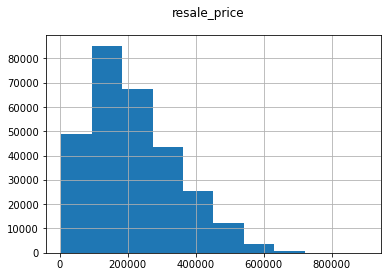

In [65]:
col = "resale_price"
finaldf[col].hist()
plt.suptitle(col)
plt.show()

In [ ]:
# Remove month, storey_range column later
df = pd.get_dummies(df, columns=['town','flat_type', 'storey_range', 'flat_model'])
df.head()

In [ ]:
df.shape

# Training Model - Regression
- We will test the training of model first.

In [ ]:
X = df.drop(['resale_price'], axis=1)
y = df['resale_price']

print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

In [ ]:
test = reg.predict(X_test)
print(test)
